In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [25]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.vigenere import *
from cipher.playfair import *
from cipher.column_transposition import *
from support.text_prettify import *
from support.plot_frequency_histogram import *

In [34]:
ca = open('6a.ciphertext').read()
cb = open('6b.ciphertext').read()
scb = sanitise(cb)

In [6]:
history_words = [w.strip() for w in open('history-words.txt')]
len(history_words)

8197

In [7]:
(key_a, wrap_a), score_a = keyword_break_mp(ca)
key_a, wrap_a, score_a

('nautilus', <KeywordWrapAlphabet.from_last: 2>, -2791.895864772198)

In [8]:
print(lcat(tpack(segment(sanitise(keyword_decipher(ca, key_a, wrap_a))))))

it was dark and dusty in the shadow archive but atleast i had found it the shelves marched off into
the gloom and most of them were empty though there was the occasional box of papers marked sa which
had clearly been forgotten in the move they would be interesting to read later but nothing in them
looked important enough to have excited my co conspirator whoever that might be it would have been
easy to get discouraged but i needed to recover the lidar so i carried on searching for the chimney
i eventually found it at the back of the stacks but there was no sign of the lidar or of any
disturbance to suggest it had fallen that far so i guessed it might have got caught on a ledge
higher up fortunately the chimney was fairly wide but not so wide that i couldnt bridge it and all
those hours on the climbing wall paid off as i climbed up looking for the lost machine as i
suspected it had caught on one of the ledges designed to catch rain so i made ready to lower it back
down but as i moved lo

In [43]:
open('6a.plaintext', 'w').write(lcat(tpack(segment(sanitise(keyword_decipher(ca, key_a, wrap_a))))))

2704

In [10]:
key_b, score_b = vigenere_frequency_break(sanitise(cb))
key_b, score_b

('a', -2672.4820858271923)

In [23]:
key_b, score_b = vigenere_frequency_break(sanitise(cat(reversed(cb))))
key_b, score_b

('a', -2672.4820858271933)

In [11]:
(key_b, wrap_b), score_b = keyword_break_mp(sanitise(cb), wordlist=history_words, fitness=Ptrigrams)
key_b, wrap_b, score_b

('abd', <KeywordWrapAlphabet.from_a: 1>, -9171.241735262733)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


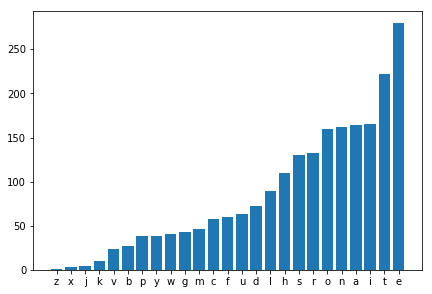

In [12]:
fc = collections.Counter(sanitise(cb))
plot_frequency_histogram(fc, sort_key=fc.get)

In [16]:
key, score = playfair_break_mp(cb, fitness=Ptrigrams, wordlist=history_words)
key, score

(('realisation', <KeywordWrapAlphabet.from_largest: 3>, {'j': 'i'}, 'x', True),
 -10108.573645429131)

In [17]:
playfair_decipher(cb, 'realisation', padding_replaces_repeat=True, wrap_alphabet=KeywordWrapAlphabet.from_largest)

'ulalblueoefurkekcglaireulondtunttlahrtrlurlhlolqegaemafgpysnanxtpllzqdagtgovuouavtkslafyxlleqrhsmawkakutekreksowwkmralovedsuaeibkenxesglwnfustslnueltlaskakagdsaksacaweniduarusfrbstliwpuolooglttrdeorvlnlmymahbdetsgtorpsluaggaxriqiahtruuofiaeulntzqirsosootleunfofohaltautrisrgelenwnmamlxankiseaovtfkwrilzwrrhrknwulorfifyxllenmlsauussnsmekobulzroglaldtukermtlwslaenulraylitkwnlmovknwwlrirmekirtsriklorsonmsolgtarzexoctlbrrctsksdpraoeerownrtsurtlsnvbskwlxrlakeoerasnasksrqnwlrlusinddngeaeaurbsotarkskabolrmerxhenuttsaestbesoanlctasrsoksnvkeawksdiforlelfobtovntazytkslttormstirformselrrtuaouaboladlrlhkoasolnpskowwlmeksriatwkbanctakrakeuidoscnirrkarcfawoebrrweravnslttsbmselrsmtrkoeuurrmristwebarmrcstbtakksriralxuektotcotaltocrcsmekirasrwkeoymtxtrmvwsuorlektcaotcapltsnlctxtrmrmscuoawriaswkbomxkseskenormxcirqmrtutgrekrnnmrmekoebhsksnulistagrsusorikerbsuurrcazarwrtsercrulsorilneyrisuoezfltlrkstxfalbnmagnadedmzlfodmrahneocadsdrawaftswrnarlqlteksrkekmsfpnbkbogeourulqibqnbcaliforafyxlleurahmaolbdoynolui

In [18]:
key, score = playfair_break_mp(cat(reversed(cb)), fitness=Ptrigrams, wordlist=history_words)
key, score

(('resurrection', <KeywordWrapAlphabet.from_a: 1>, {'j': 'i'}, 'x', True),
 -10095.318678614976)

In [19]:
playfair_decipher(cat(reversed(cb)), 'resurrection', padding_replaces_repeat=True, wrap_alphabet=KeywordWrapAlphabet.from_a)

'dwoikntanoouauisewaurciodfsqtosavrgdiadcnaoaznewvrauoernfatamkiswfovuitomwxgselwlsarsmsrwibuortctofnatlscdsiboebruifsvswnhgiinoioueouseocfwiboresmanpiiorcemkuqoosdaotikxviosdirdlrcmeeaohtosotnhncstuafrohicnotnoxmrcrnfaoueouseocfwikihokismyuszirtcczushiqiuydiohwrurteswlweddydaiurislbofcnsirtoiqqsoddosianbrioiarcriirdkbhnstaziorabrccibeqdwericnbexslurithkerelwiqaeoddgsiovkfndoztexgmkcaciroaidssvwemwelaedzgfslanrvocemnswdtckrfmsxdcgvirerlouinsuthnfsiosetoofsapsozewfxscuiritfkecilwdcwuanauaeotdoducenabucistomrncrgktoslqoovisifabnoeoncertulwdranutdyloaztsirosabossvswqnkubiifuiswlwauudwddeirweoadaabexunegtiwtkuunefaeswstdcgurvaimntsslovdcwicnbexmlurcdosahoigordutuocnssratturidcsorcxftvlstineagriiacrxmscrskmsdzcutdpwnmynpnarictcehotnwumkabmixikisowieafwsilwfecoonqenltoulvrdaunaupeuiosdoluafsmipriovwdtnwkbgnslwzirvabcieudloctaioxmaeegoedctoaoirlskwtyimewwrdqdahufzestareyeirstihvrstscimoaasiaatfgbdciotibyuepxvafciovaboeqksvcicowlicebabnonoemlrhtabatiutyslimtoztxmeocsxstulsircrinbnnvlsxmbeozoni

In [20]:
key, score = playfair_break_mp(cb, fitness=Ptrigrams)
key, score

(('resignation', <KeywordWrapAlphabet.from_largest: 3>, {'j': 'i'}, 'x', True),
 -9896.15193568302)

In [22]:
playfair_decipher(cb, 'resignation', padding_replaces_repeat=True, wrap_alphabet=KeywordWrapAlphabet.from_largest)

'orpebiosanrugcaschepgrsonuiytiotarskrersesiknupfefcentrhpcaopayakapoqssfahmtrtipxeduepfywoeofgknntwlslitasledustwlcupemtewsmcegisaiosnypxoruatrktgoearinlslshdniduscswmaueipservgdatsgvprtnuthraerweetvivomyntgbwetahaetburosffswnogekmrserteqceorotisgrauauuteogtbtbtksrapiergnrfoemaxontloftomgnecmtablwrgpowreggcoxoreteqfywoeoifkrpimsaoufasmxoryrthepoctisaucarxnepmaorlcbogalwvotwzcoxwirgucasgrtarglietauifaupyairyeasxardgrctadudplcanelstemtaesaraohfudwiwnepsaanlcaoindugfoxsrrongiyyifecepigdauaigcudsbunucelxkmaittaceatbeaupaicaixrauduixsaswdueubtrsoebtdemtotsyvaduratuucatgrbtucnssrreiptrsbuntpsrikdsinunwpudstwilndurgiawlbsodaicgslsoueuadogrgcclhsswandgrwelsvoaratacfnssruferdssoesucrgatdabsucrcatdesldurglcowoslautxsairasxrcufasgrinrwsatvpnyaucvwsmeteolacsutcskatavolvyaucucndrtswrginwlxmtcdusnsaouucxcgrfqreitfrasmeifucasanbgudaoorgnaifrsmaurgsagdsmesrcsyclwrtaelcroraurgovcargsmanzirasrduaycmibifsfapweltopbtltlcminacsfncnswmctawraprsfpxadugcasfumkidfbthnaesorgoqzidcssgbtlcfywoeoesskntunbdtvourou

In [36]:
key, score = scytale_break_mp(scb)
key, score

(3, -5512.824261230463)

In [37]:
scytale_decipher(scb, 3)

'nitaeeieafueeirniagfloigusosifiiaesehthiasrtrigouirebreeainhikadsaynahouhndarsslnornnadneorbltporlncieeyslyarothsiulotntlifuyateaeorsntfiwnsoteatlsebhvltlrtteufcasnehnhvtoacneetteegnansowtohrnteosnmrtnltehrcroeigfelgtsarettestshttabcmeltwdetbteetkowsiwneonwhtneoddrtadhsbeohtrtioitrsseivtbieyesynhwrpoaynesdoedvlpteepfutnusedlyarocnigjyokninweesunnbefetvnisrtteaaeteecseiglxrnjsfkvnadetarenusaimnitesnteearstaoluiehtcnrrdrueuhiheovmnisusoslatawhvltloefnlghpicnswdcfloteisrtgigaeuueohjebrotneorgdfiesddhmootercsrvdnhhitleeeddaeoteoigabrsiadoaeprfrraefcnehaltesiucnuogueeteotausrtghwlrftelyaitefieebeodterehttoltrottiiliuhmeigeeevdnacrtnoalhsintennasrraofcrlfolnomlentsfhsinadercroeigrtducmsynedothsneythfrncneeosatnifighdlinoorsspicabtolyicsihlyaroeoetcasclgotynnsnomfhdlgibtrsneesrpoctsniiulinligetosnmnsuataatusceyshnapaonsutdvdasaeitenenwyehrtpaonovteetflatoithyaeatoiyirfiihohraamsttrlfvnsthaeicsinenteareiraiprattkteeteetnteeeaeeundroeiieodhtshraintedoervnoawsadoltkoabercshtuhrpsilptaturetnehsb

In [29]:
history_transpositions = collections.defaultdict(list)
for word in history_words:
    history_transpositions[transpositions_of(word)] += [word]

In [30]:
len(history_transpositions)

3618

In [38]:
(trans_b, fillcol_b, emptycol_b), score = column_transposition_break_mp(scb, translist=history_transpositions)
(trans_b, fillcol_b, emptycol_b), score

(((1, 0, 4, 3, 2), False, False), -5002.149995605427)

In [39]:
column_transposition_decipher(scb, trans_b, fillcolumnwise=fillcol_b, emptycolumnwise=emptycol_b)

'infiltratingthedeliberationsofourenemiesisaprincipalgoalbutfollowingmydiscussionswithplayfairihavecometoseethattheclassicalstrategyoftryingtoturnaseniormemberofthedelegationsisbothriskyandunnecessaryanyapproachtosuchanindividualriskssignallingourintentionsandunderminesourabilitytoadaptourplanssecrecyiseverythingasplayfairpointsoutthoseindividualsoftenhavelittleinfluenceanywaytheyaretheretopresentapointofviewandthebestofthematleasttolistenbuttheyhavelittleauthoritythejuniorofficialsontheotherhandhavealmosttotalcontrolofeventstheysettheagendaindiscussionwithoneanotherandtheirseniorsandmoreimportantlytheytaketherecordofthemeetingafterthedelegateshavereturnedtotheirhomesitisthatrecordthatbecomestherealitywedonotneedtobethereoreventoknowwhatwassaidweneedonlytoknowwhathasbeenrecordedasthetruthandwherepossibletoshapethattruthinourbestintereststhisibelievetobeanentirelynewstrategyintheworldofdiplomacyandiampleasedtobeabletodevelopitwiththehelpofsuchadistinguishedfriendplayfairisamanofcunninga

In [40]:
print(lcat(tpack(segment(column_transposition_decipher(scb, trans_b, fillcolumnwise=fillcol_b, emptycolumnwise=emptycol_b)))))

infiltrating the deliberations of our enemies is a principal goal but following my discussions with
playfair i have come to see that the classical strategy of trying to turn a senior member of the
delegations is both risky and unnecessary any approach to such an individual risks signalling our
intentions and undermines our ability to adapt our plans secrecy is everything as playfair points
out those individuals often have little influence anyway they are there to present a point of view
and the best of them atleast to listen but they have little authority the junior officials on the
other hand have almost total control of events they set the agenda in discussion with one another
and their seniors and more importantly they take the record of the meeting after the delegates have
returned to their homes it is that record that becomes the reality we do not need to be there or
even to know what was said we need only to know what has been recorded as the truth and where
possible to shape tha

In [42]:
open('6b.plaintext', 'w').write(lcat(tpack(segment(column_transposition_decipher(scb, trans_b, fillcolumnwise=fillcol_b, emptycolumnwise=emptycol_b)))))

2599

In [44]:
history_transpositions[trans_b]

['called',
 'banning',
 'carroll',
 'banned',
 'cause',
 'newton',
 'bavaria',
 'battle',
 'mayun',
 'barrier',
 'baron',
 'damaged',
 'based',
 'fatih',
 'canning',
 'carol',
 'basic',
 'jerome',
 'revues',
 'earlier',
 'mission']

In [45]:
transpositions[trans_b]

['baked',
 'baled',
 'bared',
 'barge',
 'baron',
 'based',
 'basic',
 'basie',
 'bated',
 'bathe',
 'baton',
 'baulk',
 'bayed',
 'caged',
 'caked',
 'calif',
 'caned',
 'caped',
 'capon',
 'cared',
 'carne',
 'carol',
 'carom',
 'carpi',
 'cased',
 'caulk',
 'cause',
 'caved',
 'cawed',
 'eaton',
 'fermi',
 'heron',
 'jason',
 'karol',
 'layup',
 'lexus',
 'mason',
 'mauro',
 'meson',
 'metro',
 'mixup',
 'newts',
 'nexts',
 'nexus',
 'onyxs',
 'pouts',
 'routs',
 'babied',
 'bagged',
 'balled',
 'banned',
 'barbed',
 'barbie',
 'barker',
 'baroda',
 'barred',
 'barrie',
 'barron',
 'bashes',
 'basics',
 'batted',
 'battle',
 'bauble',
 'cached',
 'called',
 'callie',
 'canine',
 'caning',
 'canned',
 'capped',
 'carafe',
 'carnal',
 'carpal',
 'carrie',
 'cashes',
 'cassie',
 'cattle',
 'causal',
 'causes',
 'cayley',
 'cayuga',
 'damage',
 'dandle',
 'dannie',
 'dapple',
 'darker',
 'darned',
 'darner',
 'dashed',
 'dashes',
 'dawdle',
 'dawned',
 'dazzle',
 'geyser',
 'heusen',
 '